## Python and Pandas
In this notebook, we will study the working with series and dataframes and indices. We will also discuss the groupBy operation

## Size of python objects

In [3]:
import sys
sizeof = sys.getsizeof
print(sizeof(10))    # size of an int
print(sizeof([]))  # size of an empty list
my_list = list(range(1000))    # python object
print(sizeof(my_list))

# Numpy array
import numpy as np
my_list1 = np.arange(1000, dtype=np.int32)   # numpy array - less memory
print(sizeof(my_list1))
type(my_list[0])         # what is the type of the object

28
64
9112
4096


int

## processing efficiency - Python vs NumPy

In [4]:
# how long it takes to sum a python list?
my_list = list(range(1000000)) 
%timeit(sum(my_list))               # shift-tab to see function definition

# how long it takes to sum a numpy list of same size
import numpy as np
my_list1 = np.arange(1000000, dtype=np.int32)   # create a numpy array
%timeit my_list1.sum()    #python native sum function
%timeit np.sum(my_list1)  #numpy sum function


54.6 ms ± 7.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
772 µs ± 39.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
772 µs ± 41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Numpy views

In [5]:
my_list = np.arange(24, dtype=np.int32)
my_list2 = my_list.reshape((4,6))
print(np.info(my_list))
print('__________________________')
print(np.info(my_list2))
my_list2

class:  ndarray
shape:  (24,)
strides:  (4,)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x280f60838b0
byteorder:  little
byteswap:  False
type: int32
None
__________________________
class:  ndarray
shape:  (4, 6)
strides:  (24, 4)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x280f60838b0
byteorder:  little
byteswap:  False
type: int32
None


array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

## numpy indexing


In [6]:
print(my_list2)
print(my_list2[:,0:2])  # it only includes [0 2)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
[[ 0  1]
 [ 6  7]
 [12 13]
 [18 19]]


### Create a Series Object

In [7]:
import pandas as pd
tmp = pd.Series([1,2,3,3])
tmp2 = pd.Series([1,"2",3,"3"])
print(tmp)
print(tmp.min())
print(tmp[1:3])

0    1
1    2
2    3
3    3
dtype: int64
1
1    2
2    3
dtype: int64


### Create a Data Frame object

In [8]:
import pandas as pd
import numpy as np
# see numpy documentation for more info on random - 
# https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html
df = pd.DataFrame(np.random.randn(3,4))
df.head()

,0,1,2,3
0,0.655210,-1.469362,1.033530,-0.883092
1,0.969826,2.338546,-0.297569,1.170383
2,-1.070958,-0.304607,-1.215437,1.369147


## Key operations on a Data Frame

In [9]:
print(df.sum(axis=0))
print(df.count())
print(df.min())
print(df.max())
print(df[1].apply(lambda x : x*2))
print(df.describe())
print(df.head(2))

0    0.554079
1    0.564577
2   -0.479476
3    1.656438
dtype: float64
0    3
1    3
2    3
3    3
dtype: int64
0   -1.070958
1   -1.469362
2   -1.215437
3   -0.883092
dtype: float64
0    0.969826
1    2.338546
2    1.033530
3    1.369147
dtype: float64
0   -2.938724
1    4.677093
2   -0.609214
Name: 1, dtype: float64
              0         1         2         3
count  3.000000  3.000000  3.000000  3.000000
mean   0.184693  0.188192 -0.159825  0.552146
std    1.098745  1.951200  1.130793  1.246920
min   -1.070958 -1.469362 -1.215437 -0.883092
25%   -0.207874 -0.886985 -0.756503  0.143645
50%    0.655210 -0.304607 -0.297569  1.170383
75%    0.812518  1.016970  0.367981  1.269765
max    0.969826  2.338546  1.033530  1.369147
          0         1         2         3
0  0.655210 -1.469362  1.033530 -0.883092
1  0.969826  2.338546 -0.297569  1.170383


### Read a CSV file into a Data Frame

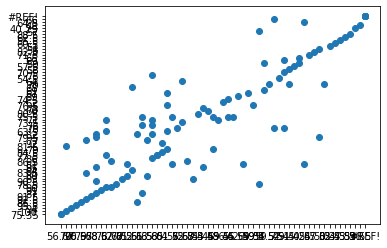

In [10]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
#df = pd.read_csv('DataSets/205_grades.csv')
df = pd.read_csv('DataSets/439_grades.csv')
df.head(10)
#df1 = df[['Midterm','Finals']]
df1 = df[['37','38']]
df1
df1.drop([0])

df1 = df1.drop([0])
df1
df1 = df1.dropna()
#x = df1['midterm']
#y = df1['Finals']

x = df1['37']
y = df1['38']

y    # note the type of elements in y. they are not float (need to convert)
x    # note the type of elements in x. they are float
#y = y.apply(pd.to_numeric) # convert y to float
plt.pyplot.scatter(x,y)   # note that this shows if you scroe low in midterm implies low in finals

# QUESTION : HOW would you interpret the plot?

## Reading Large Files into a Data Frame

In [11]:
# READING LARGE FILES IN PYTHON

# check the size of the file
import os
file_size = os.path.getsize("DataSets/Voter_Registration_Data.csv")
print (file_size)    # should be 3.4 MB

input = open('DataSets/Voter_Registration_Data.csv','r')

# read the first 10 lines
for lines in range(10):
    line = input.readline()
    print(line)
    

# read the large file 10 lines at a time
#input = open('DataSets/Voter_Registration_Data.csv','r')
 
#while(1):
#    for lines in range(10):
#        print (input.readline())
#    print ("Received 10 lines")

3394982
COUNTY,HD_CODE,HD_NAME,CD_CODE,CD_NAME,PARTY,SYSDATE,COUNT(V.ID)

DOUGLAS,SR01,House District 01,4th Cong,US Congressional District 4,Independent Party,12/07/2018,529

CURRY,SR01,House District 01,4th Cong,US Congressional District 4,Libertarian,12/07/2018,148

CURRY,SR01,House District 01,4th Cong,US Congressional District 4,Republican,12/07/2018,5695

COOS,SR01,House District 01,4th Cong,US Congressional District 4,Constitution,12/07/2018,46

JOSEPHINE,SR01,House District 01,4th Cong,US Congressional District 4,Independent Party,12/07/2018,143

COOS,SR01,House District 01,4th Cong,US Congressional District 4,Progressive,12/07/2018,5

DOUGLAS,SR01,House District 01,4th Cong,US Congressional District 4,Other,12/07/2018,67

DOUGLAS,SR01,House District 01,4th Cong,US Congressional District 4,Constitution,12/07/2018,22

JOSEPHINE,SR01,House District 01,4th Cong,US Congressional District 4,Working Families Party of Oregon,12/07/2018,10



In [18]:
df = pd.read_csv('DataSets/Voter_Registration_Data.csv')
df.head()
df.size
df.describe()

,COUNT(V.ID)
count,34848.000000
mean,2052.364182
std,4147.523510
min,0.000000
25%,27.000000
50%,139.000000
75%,1678.500000
max,34982.000000


### Plot the Data with Matplotlib

In [ ]:
df['midterm'].plot()

In [ ]:
dfs = df['midterm'].sort_values()         # this also sorts the index
dfs.reset_index(drop=True, inplace=True)  # reset the index
dfs.plot()

### Appending Data Frames

In [19]:
import pandas as pd
import numpy as np
first = pd.DataFrame(np.random.randn(5,4))
second = pd.DataFrame(np.random.randn(5,4))
# append data frames to create a longer one 10x4
pd.concat([first, second])

,0,1,2,3
0,-1.335286,-0.434846,0.098028,0.088884
1,-1.304256,0.763762,0.105769,-1.101417
2,1.108543,-1.663809,1.516044,-1.926018
3,-0.101184,0.913639,-1.801458,0.736300
4,-0.481246,-0.522829,-0.127177,0.270185
0,0.196674,-1.049589,-0.289888,-0.337219
1,1.012649,-0.942926,-0.574270,-0.889460
2,-1.118977,1.510706,-1.098021,-0.288710
3,-0.471432,-0.485001,0.377157,-0.599846
4,0.372858,0.771452,-0.701034,-0.179683


### Merging Data Frames

In [21]:
# merge two data frames by a key
left = pd.DataFrame({'netID' : ['adg133', 'abs134', 'def234'], 'midterm': [67, 89, 90]})
right = pd.DataFrame({'netID' : ['adg133', 'abs134', 'def234'], 'final' : [87, 69, 50]})
type(pd.merge(left,right, on='netID'))


pandas.core.frame.DataFrame

### Data Wrangling
finding missing data and replacing them with zeros

In [23]:
import pandas as pd
df = pd.read_csv('DataSets/205_grades.csv')
# count the missing data in each column
df.apply(lambda x: sum(x.isnull()), axis=0)

# replace all missing pset1 scores with zeros
df['pset1'].fillna(0, inplace=True)

### In-class Workshop

In [ ]:
# Create a data frame (in two ways) with column names ‘fruit’ and ‘color’ and add rows 
# for 5 of your favorite fruits (and colors)

# FIRST METHOD OF CREATING A DATA FRAME
import pandas as pd
fruit_info = pd.DataFrame(
    data={'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'color': ['red', 'orange', 'yellow', 'pink']
          })
fruit_info


# SECOND METHOD OF CREATING A DATA FRAME
fruit_info2 = pd.DataFrame(
    [("red", "apple"), ("orange", "orange"), ("yellow", "banana"),
     ("pink", "raspberry")], 
    columns = ["color", "fruit"])
fruit_info2

In [ ]:
# ADD A PRICE/lb TO EACH FRUIT
fruit_info["price"] = [2.30, 1.00, 4.50, 3.75]
fruit_info

In [ ]:
# Assert that there are no NULL values in the table
fruit_info.apply(lambda x: sum(x.isnull()), axis=0)

### Extracting Rows and Columns from a Data Frame

In [7]:
import pandas as pd
df = pd.read_csv('DataSets/205_grades.csv')
df1 = df['midterm']
print (df1.head(5))
df2 = df[['midterm', 'Finals']]
print(df2.head(6))
type(df2)

0    55.129771
1    28.000000
2          NaN
3    12.000000
4    45.500000
Name: midterm, dtype: float64
     midterm       Finals
0  55.129771     pts(20%)
1  28.000000            0
2        NaN            0
3  12.000000            0
4  45.500000  17.71428571
5  58.000000  17.28571429


pandas.core.frame.DataFrame

In [8]:
# indexing by row slices allow us to pick a rows with specific indices
df[2:3]
# or find a midterm for students from 2 to 9
df[2:10]['midterm']

2     NaN
3    12.0
4    45.5
5    58.0
6    68.0
7    64.5
8    74.0
9    52.5
Name: midterm, dtype: float64

In [9]:
## WORKSHOP PROBLEM
import pandas as pd
weird = pd.DataFrame({1:["hotdog", "topdog"], "1": ['food', 'animal']})
weird[1- ]

SyntaxError: invalid syntax (<ipython-input-9-2b465cb4f713>, line 4)

### Boolean Arrays


In [10]:
# Set TRUE if student midterm score was greater than 50%
df[df['midterm'] > 50]
# use multiple criterias
df[(df['midterm'] > 80) & (df['course'] == 'A')]

,Recitation,attendance,performance,mid,notes,wk3,wk4,wk5,wk6,wk7,...,Finals,q1.2,Unnamed: 42,rank,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,course,Final
24,7.0,NaN,NaN,13,NaN,7.0,7.0,7.0,7.0,7.0,...,17.14285714,17,18,20,10,8,9,7,A,13
47,7.0,NaN,NaN,1,NaN,7.0,7.0,7.0,NaN,7.0,...,21.71428571,18,86,86,74,73,4,4,A,1
50,7.0,NaN,NaN,25,NaN,7.0,7.0,7.0,0.0,NaN,...,15.14285714,10,43,46,22,20,20,29,A,25
88,8.0,NaN,NaN,4,NaN,8.0,8.0,8.0,8.0,8.0,...,18.14285714,16,6,6,4,2,6,6,A,4
113,9.0,NaN,NaN,6,NaN,9.0,9.0,9.0,9.0,9.0,...,17.57142857,16,8,5,2,3,3,3,A,6
116,9.0,NaN,NaN,3,NaN,9.0,9.0,9.0,9.0,9.0,...,18.14285714,18,9,8,5,4,1,1,A,3
128,9.0,NaN,NaN,11,NaN,9.0,NaN,9.0,9.0,9.0,...,18.85714286,18,15,15,11,11,10,16,A,11
137,9.0,NaN,NaN,16,NaN,9.0,9.0,9.0,9.0,9.0,...,13,12,7,9,6,6,5,10,A,16


### Pandas loc and iloc

In [11]:
import pandas as pd
df = pd.read_csv('DataSets/205_grades.csv')

In [12]:
df.loc[[0,1,3],['midterm']]   # list of values

,midterm
0,55.129771
1,28.000000
3,12.000000


In [24]:
df2 = df.loc[0:3,['midterm']]   # range of value
df2

,midterm
0,55.129771
1,28.000000
2,NaN
3,12.000000


In [14]:
# provide a single value for the second argument, we get a series
df.loc[0:3,'midterm']

0    55.129771
1    28.000000
2          NaN
3    12.000000
Name: midterm, dtype: float64

In [ ]:
df.head()
df.size
df.shape
df.describe

In [ ]:
df.index

In [ ]:
df.columns

### GroupBy demos

In [25]:
import pandas as pd

df = pd.DataFrame(
    [["Joey",      "blue",    42,  "M"],
     ["Weiwei",    "blue",    50,  "F"],
     ["Joey",      "green",    8,  "M"],
     ["Karina",    "green",    7,  "F"],
     ["Fernando",  "pink",    -9,  "M"],
     ["Nhi",       "blue",     3,  "F"],
     ["Sam",       "pink",   -42,  "M"]], 
    columns = ["Name", "Color", "Number", "Sex"])
df

,Name,Color,Number,Sex
0,Joey,blue,42,M
1,Weiwei,blue,50,F
2,Joey,green,8,M
3,Karina,green,7,F
4,Fernando,pink,-9,M
5,Nhi,blue,3,F
6,Sam,pink,-42,M


In [26]:
# group by Color
grps = df.groupby("Color")
# type of the object grps is a GroupByObject
print(type(grps))

# this displays key and the dataframe(item) as a tuple (immutable panda list)
for key in grps:
    print(key, "\n")

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>
('blue',      Name Color  Number Sex
0    Joey  blue      42   M
1  Weiwei  blue      50   F
5     Nhi  blue       3   F) 

('green',      Name  Color  Number Sex
2    Joey  green       8   M
3  Karina  green       7   F) 

('pink',        Name Color  Number Sex
4  Fernando  pink      -9   M
6       Sam  pink     -42   M) 



In [18]:
# group by Color
grps = df.groupby("Color")
# The keys[0]=key and item = keys[1] are the data frames that were grouped based on a key = 'color'
for keys in grps:
    print(keys[1], "\n")

     Name Color  Number Sex
0    Joey  blue      42   M
1  Weiwei  blue      50   F
5     Nhi  blue       3   F 

     Name  Color  Number Sex
2    Joey  green       8   M
3  Karina  green       7   F 

       Name Color  Number Sex
4  Fernando  pink      -9   M
6       Sam  pink     -42   M 



In [19]:
# Group the people by Color
people_by_color = df['Name'].groupby(df['Color'])

print (people_by_color.describe())
print("---------------------------\n\n")
for keys in people_by_color:
    print(keys[0], "\n")
print("---------------------------\n\n")
for keys in people_by_color:
    print(keys[1], '\n')       # keys[1] is a series object
    


      count unique       top freq
Color                            
blue      3      3       Nhi    1
green     2      2      Joey    1
pink      2      2  Fernando    1
---------------------------


blue 

green 

pink 

---------------------------


0      Joey
1    Weiwei
5       Nhi
Name: Name, dtype: object 

2      Joey
3    Karina
Name: Name, dtype: object 

4    Fernando
6         Sam
Name: Name, dtype: object 



### Perform stats on each group

In [20]:
# sum items (summable) in each group
grouped_by_color = df.groupby('Color')
grouped_by_color.sum()
grouped_by_color.mean()
grouped_by_color.median()

,Number
Color,
blue,42.0
green,7.5
pink,-25.5


In [ ]:
# Most of the built-in handy aggregation methods are just shorthand for a universal 
# aggregation method called agg.
# Example, .mean() is just .agg(np.mean).
import numpy as np
grouped_by_color.agg(np.mean)
grouped_by_color.agg(np.max)
grouped_by_color.agg(np.min)

In [ ]:
grouped_by_color.describe()

## Filter by Function

In [ ]:
f = lambda sf: sf['Number'].mean() > 5
grouped_by_color = df.groupby('Color')
print(df)
# filter all records whose mean is > 5
grouped_by_color.filter(f)

## group by two criterias

In [ ]:
grouped_by_sex_and_color = df.groupby([df['Sex'],df['Color']])
grouped_by_sex_and_color      # type is a DataFrameGroupBy
# each item is a tuple of the form  ((criteria1, criteria2),dataFrame)
for item in grouped_by_sex_and_color:
    print(item, '\n')       

In [ ]:
df.groupby(["Sex", "Color"]).count()

In [ ]:
import pandas as pd

df = pd.DataFrame(
    [["Joey",      "blue",    42,  "M"],
     ["Weiwei",    "blue",    'm',  "F"],
     ["Joey",      10,    8,  "M"],
     ["Karina",    "green",    7,  "F"],
     ["Fernando",  "pink",    -9,  "M"],
     ["Nhi",       "blue",     3,  "F"],
     ["Sam",       "pink",   -42,  "M"]], 
    columns = ["Name", "Color", "Number", "Sex"])
df.dtypes

In [ ]:
tmp = pd.Series([51,21,3,3])
tmp
tmp[1:3]
type(tmp)